# Customer Shopping Exploratory Data Analysis (EDA)

### Information for the dataset

In this notebook, we will explore the dataset of customer shopping. The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset). The dataset contains 1000 rows and 10 columns. The dataset contains the following columns:

Content Attribute Information:

- invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.

- customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.

- gender: String variable of the customer's gender.

- age: Positive Integer variable of the customers age.

- category: String variable of the category of the purchased product.

- quantity: The quantities of each product (item) per transaction. Numeric.

- price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).

- payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.

- invoice_date: Invoice date. The day when a transaction was generated.

- shopping_mall: String variable of the name of the shopping mall where the transaction was made

## İmporting Libraries and Dataset

In [2]:
#We will import the necessary libraries for the analysis. We will use pandas for data manipulation, numpy for numerical calculations, and matplotlib for data visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#We will import the dataset and store it in a variable called data. We will use the read_csv function from pandas to read the csv file.

data = pd.read_csv('customer_shopping_data.csv')

#We will use the head function to display the first 5 rows of the dataset.

data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## Let's start

In [4]:
#We will use the describe function to get a statistical summary of the dataset.".T is used to transpose the data."

data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256322,941.184567,5.23,45.45,203.3,1200.32,5250.0


In [5]:
#We will use the info function to get a concise summary of the dataset.

data.info() 

print("*"*100)
#We will use the isnull function to check for missing values in the dataset.

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
****************************************************************************************************


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
#We will use the value_counts function to get the count of unique values in the dataset.

data.value_counts()

invoice_no  customer_id  gender  age  category         quantity  price    payment_method  invoice_date  shopping_mall    
I100008     C199951      Male    65   Clothing         5         1500.40  Cash            10/7/2022     Emaar Square Mall    1
I312466     C139574      Female  67   Clothing         4         1200.32  Credit Card     22/09/2021    Kanyon               1
I312529     C419632      Female  35   Food & Beverage  2         10.46    Credit Card     6/11/2021     Viaport Outlet       1
I312524     C123511      Female  68   Clothing         5         1500.40  Cash            5/2/2021      Zorlu Center         1
I312523     C248293      Male    35   Technology       1         1050.00  Cash            23/04/2022    Kanyon               1
                                                                                                                            ..
I206379     C272482      Male    31   Shoes            2         1200.34  Debit Card      8/9/2022      Metrocity   

In [7]:
#We will use the nuninque function to get the number of unique values in each column.

data.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                41
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [8]:
#We will use the drop_duplicates function to remove duplicate rows from the dataset.

data.drop_duplicates(inplace=True)

In [9]:
#We will use the shape function to get the number of rows and columns in the dataset.

data.shape

(99457, 10)

In [10]:
#We will use the drop function to remove the columns that are not needed for the analysis.

data.drop(['invoice_no','customer_id'],axis=1,inplace=True)

In [11]:
""" 
This function categorizes ages into three groups based on the input value
'age' is less than or equal to 30 --> young
'age' is greater than 30 less than or equal to 50 --> middle
'age' is greater than 50 --> old
"""
def age_cat(age):
    if age <=30:
        age= 'young'
    elif age >30 and age <=50:
        age= 'middle'
    else:
        age= 'old'
    return age

In [12]:
#We will add a new column called age_category to the dataset.

data['age_category'] = data['age'].apply(age_cat)

#We will add a new column called total_price to the dataset.

data['total_price'] = data['quantity'] * data['price']

data.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total_price
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,young,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,young,5401.53
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,young,300.08
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,old,15004.25
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,old,242.40


In [28]:
data['invoice_date'] = data['invoice_date'].astype('datetime64')   

# Year
data['year'] = data['invoice_date'].dt.strftime("%Y")

# Month
data['month'] = data['invoice_date'].dt.strftime("%m")

# Weekday
data['weekday'] = data['invoice_date'].dt.strftime("%w")

# Day
data['day'] = data['invoice_date'].dt.strftime("%d")


C:\Users\ahmet\AppData\Local\Temp\ipykernel_18500\3033615846.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['invoice_date'] = data['invoice_date'].astype('datetime64')


In [29]:
data.sample(10)

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_category,total_price,year,month,weekday,day
66729,Male,45,Food & Beverage,1,5.23,Cash,2021-11-07,Mall of Istanbul,middle,5.23,2021,11,0,07
92093,Female,24,Cosmetics,1,40.66,Cash,2022-11-27,Istinye Park,young,40.66,2022,11,0,27
48636,Female,66,Shoes,5,3000.85,Cash,2022-12-23,Mall of Istanbul,old,15004.25,2022,12,5,23
51888,Female,68,Clothing,2,600.16,Credit Card,2021-08-11,Mall of Istanbul,old,1200.32,2021,08,3,11
66306,Female,24,Clothing,3,900.24,Cash,2021-12-07,Metropol AVM,young,2700.72,2021,12,2,07
54511,Female,32,Shoes,1,600.17,Cash,2023-01-28,Kanyon,middle,600.17,2023,01,6,28
54625,Female,41,Cosmetics,4,162.64,Debit Card,2021-04-23,Mall of Istanbul,middle,650.56,2021,04,5,23
78171,Female,28,Clothing,5,1500.40,Cash,2022-08-08,Mall of Istanbul,young,7502.00,2022,08,1,08
70548,Female,45,Cosmetics,4,162.64,Credit Card,2021-01-12,Kanyon,middle,650.56,2021,01,2,12
35597,Male,67,Clothing,1,300.08,Credit Card,2022-04-05,Metropol AVM,old,300.08,2022,04,2,05


1. Which age group spends the most on shopping?

In [13]:
#We will use the groupby function to group the data by age_category and gender. 

data.groupby(['age_category','gender']).sum()

"This analysis shows that middle-aged female customers spend the most on shopping also, young male customers spend the least on shopping."

C:\Users\ahmet\AppData\Local\Temp\ipykernel_18500\4230571880.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['age_category','gender']).sum()


'This analysis shows that middle-aged female customers spend the most on shopping also, young male customers spend the least on shopping.'

2. Which gender has the highest average expenditure?

In [84]:
data.groupby("gender")["total_price"].mean()

"This analysis shows that if we look at the average of expenditures, men have spent more."

'This analysis shows that if we look at the average of expenditures, men have spent more.'

3. Which age group has the highest average expenditure?

In [15]:
data.groupby("age_category")["total_price"].mean()                                                                           

"This analysis shows that if we look at the average of expenditures, middle-aged customers have spent the most."

'This analysis shows that if we look at the average of expenditures, middle-aged customers have spent the most.'

4. Which category is the most purchased category?

In [16]:
data.groupby("category")["total_price"].count()

"This analysis shows that the most purchased category is clothing and the least one is books."

'This analysis shows that the most purchased category is clothing and the least one is books.'

## Data Visualization

1. Customer Gender Distribution:

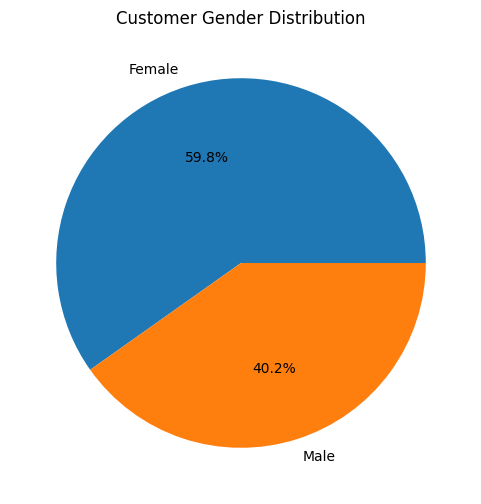

In [17]:
# Calculate the count of each gender
gender_count = data['gender'].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(gender_count, labels=gender_count.index , autopct='%1.1f%%')
ax.set_title('Customer Gender Distribution')

plt.show()


2. Count of Orders by Category

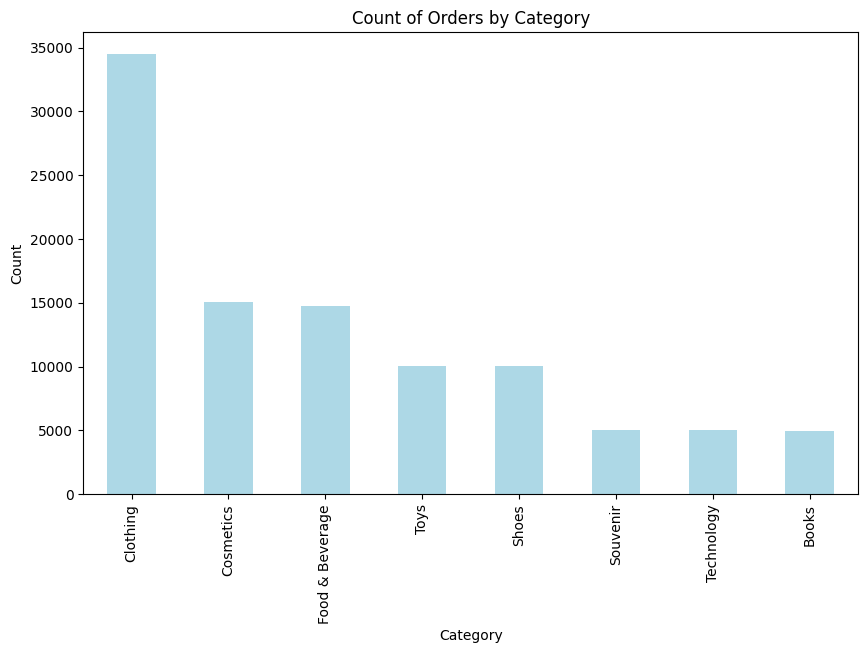

In [18]:
# create a bar chart to visualize the count of each category
fig, ax = plt.subplots(figsize=(10, 6))
category_count = data['category'].value_counts()
category_count.plot(kind='bar', color='lightblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Orders by Category')

plt.show()


3.  Count of Customers by Shopping Mall

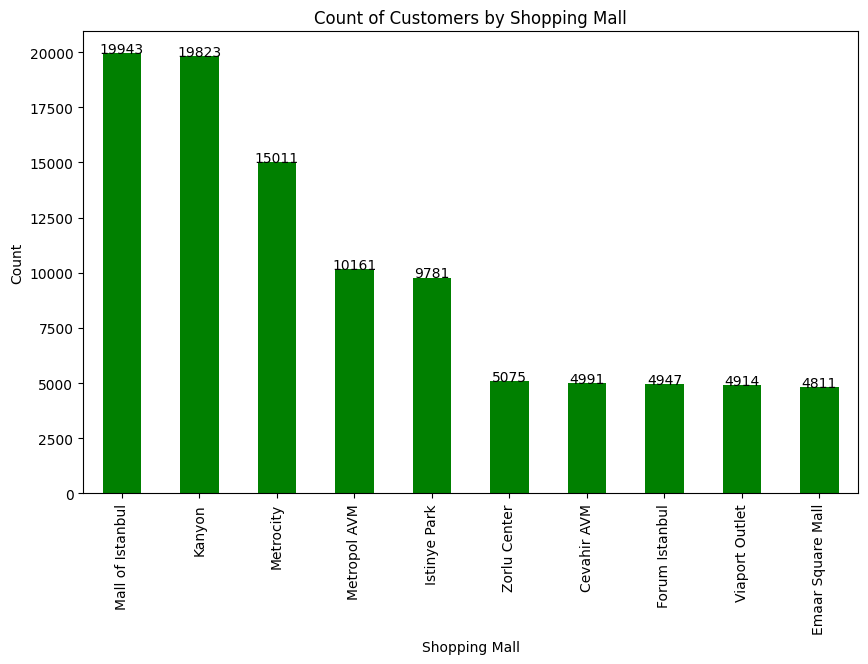

In [19]:
# create a bar chart to visualize the count of each shopping mall
fig, ax = plt.subplots(figsize=(10, 6))
mall_count = data['shopping_mall'].value_counts()
mall_count.plot(kind='bar', color='green')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.title('Count of Customers by Shopping Mall')

# add labels to the bars
for i, count in enumerate(mall_count):
    plt.text(i, count+10, str(count), ha='center')

plt.show()

4. Count of Customers by Age Category

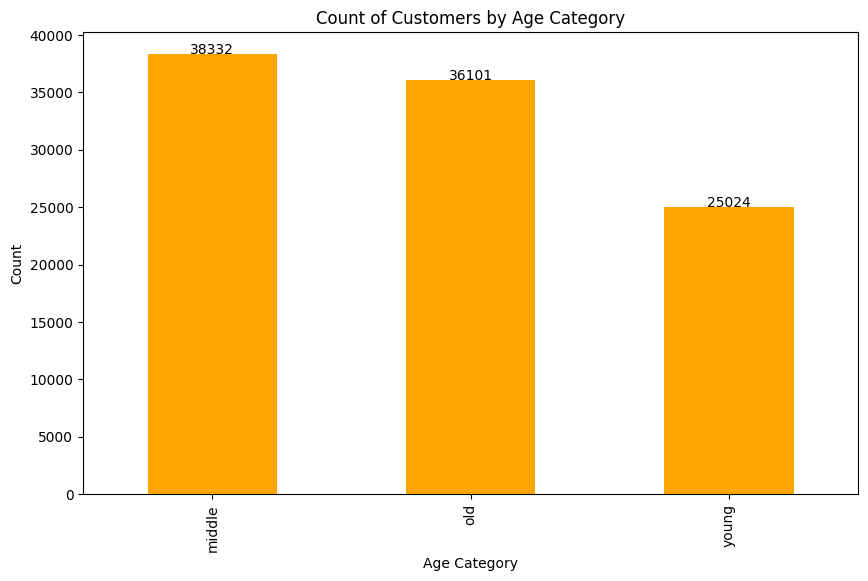

In [20]:
# create a bar chart to visualize the count of each age category 
fig, ax = plt.subplots(figsize=(10, 6))
age_count = data['age_category'].value_counts()
age_count.plot(kind='bar', color='orange')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Customers by Age Category') 

# add labels to the bars
for i, count in enumerate(age_count):
    plt.text(i, count+10, str(count), ha='center')

plt.show()

## Data Visulation with Bokeh

In [56]:
!pip install bokeh


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
grouped_df = data.groupby('month')['total_price'].sum().reset_index()
grouped_df.sample(10)

,month,total_price
11,12,20099529.82
7,08,19812561.97
3,04,20360575.14
0,01,25755677.65
1,02,23980067.68
10,11,18700196.96
9,10,21049007.84
6,07,20721536.72
5,06,20344057.02
2,03,20826196.84


In [80]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

grouped_df = data.groupby('month')['total_price'].sum().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Aylara Göre Toplam Alışveriş Miktarı', x_range=grouped_df['month'], width=800, height=400)
p.line(x='month', y='total_price', source=source, line_width=2)
p.xaxis.axis_label = 'Ay'
p.yaxis.axis_label = 'Toplam Alışveriş Miktarı'

show(p)

#VERİNİN DÜZENSİZLĞİ NEDENİYLE GRAFİĞİN DOĞRULUĞU ŞÜPHELİDİR.

In [85]:
# Cinsiyete göre alışveriş miktarını hesaplayın
grouped_df = data.groupby('gender')['total_price'].sum().reset_index()

# Verileri Bokeh veri kaynağına aktarın
source = ColumnDataSource(grouped_df)

# Bokeh figürünü oluşturun
p = figure(title='Cinsiyete Göre Toplam Alışveriş Miktarı', x_range=grouped_df['gender'], width=800, height=400)

# Çubuk grafiklerini oluşturun
p.vbar(x='gender', top='total_price', source=source, width=0.5)

# Eksen etiketlerini ayarlayın
p.xaxis.axis_label = 'Cinsiyet'
p.yaxis.axis_label = 'Toplam Alışveriş Hacmi'

# Grafikleri gösterin
show(p)

In [97]:

grouped_df = data.groupby('gender')['total_price'].mean().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Cinsiyete Göre Ortalama Alışveriş Harcaması', x_range=grouped_df['gender'], width=400, height=400)
p.vbar(x='gender', top='total_price', source=source, width=0.8)
p.xaxis.axis_label = 'Cinsiyet'
p.yaxis.axis_label = 'Toplam Alışveriş Hacmi'


show(p)

In [100]:
grouped_df = data.groupby('age_category')['total_price'].sum().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Yaşa Göre Toplam Alışveriş Miktarı', x_range=grouped_df['age_category'], width=800, height=400)
p.line(x='age_category', y='total_price', source=source, line_width=2)
p.xaxis.axis_label = 'Yaş'
p.yaxis.axis_label = 'Toplam Alışveriş Miktarı'

show(p)

In [101]:
grouped_df = data.groupby('age_category')['total_price'].mean().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Yaşa Göre Ortalama Alışveriş Harcaması', x_range=grouped_df['age_category'], width=400, height=400)
p.vbar(x='age_category', top='total_price', source=source, width=0.8)
p.xaxis.axis_label = 'Yaş'
p.yaxis.axis_label = 'Toplam Alışveriş Hacmi'

show(p)

In [102]:
grouped_df = data.groupby('category')['total_price'].sum().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Kategoriye Göre Toplam Alışveriş Miktarı', x_range=grouped_df['category'], width=800, height=400)
p.line(x='category', y='total_price', source=source, line_width=2)
p.xaxis.axis_label = 'Kategori'
p.yaxis.axis_label = 'Toplam Alışveriş Miktarı'

show(p)

In [104]:
grouped_df = data.groupby('category')['total_price'].mean().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Kategoriye Göre Ortalama Alışveriş Harcaması', x_range=grouped_df['category'], width=800, height=400)
p.vbar(x='category', top='total_price', source=source, width=0.8)
p.xaxis.axis_label = 'Kategori'
p.yaxis.axis_label = 'Toplam Alışveriş Hacmi'

show(p)

In [105]:
grouped_df = data.groupby('shopping_mall')['total_price'].sum().reset_index()
source = ColumnDataSource(grouped_df)

p = figure(title='Alışveriş Merkezine Göre Toplam Alışveriş Miktarı', x_range=grouped_df['shopping_mall'], width=800, height=400)
p.line(x='shopping_mall', y='total_price', source=source, line_width=2)
p.xaxis.axis_label = 'Alışveriş Merkezi'
p.yaxis.axis_label = 'Toplam Alışveriş Miktarı'

show(p)